In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import mode

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Marina\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read CSV File

In [2]:
df = pd.read_csv(r"Prostate_Cancer.csv")

# Data Analysis

## 1. display top 5 rows

In [3]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## 2. Preview data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


### no missing values but there is a categorical column

# Univariate Analysis

<AxesSubplot: ylabel='diagnosis_result'>

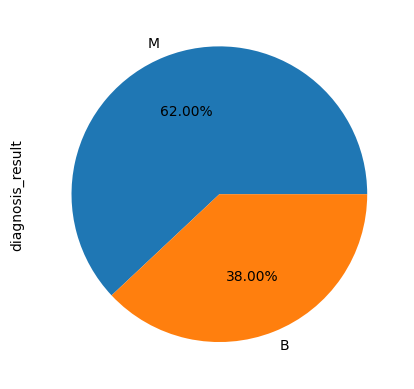

In [5]:
df['diagnosis_result'].value_counts().plot(kind="pie",autopct="%1.2f%%")

# multi/bivariate analysis

C:\Users\Marina\AppData\Local\Temp\ipykernel_14560\2026696898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df.corr(), annot=True)


<AxesSubplot: >

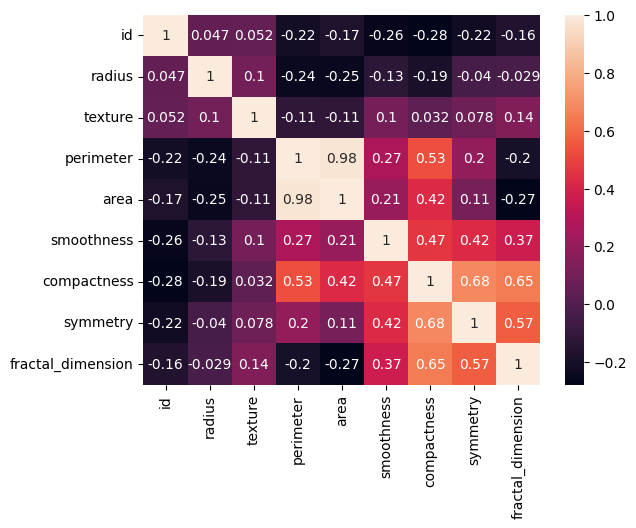

In [6]:
sns.heatmap( df.corr(), annot=True)

## visualize the relation between perimeter and area

<AxesSubplot: xlabel='perimeter', ylabel='area'>

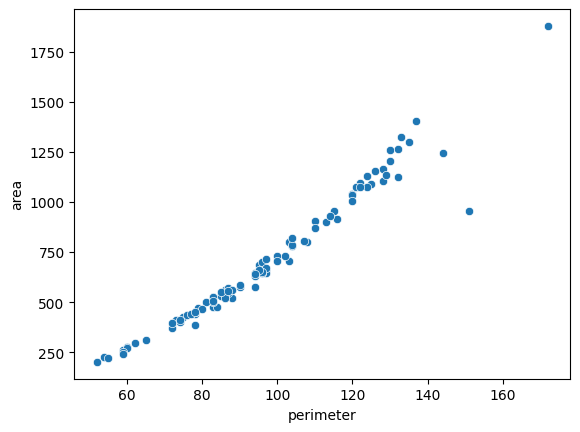

In [7]:
sns.scatterplot(x=df['perimeter'],y=df['area'])

# Data Preprocessing

In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'id': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
Unique values in 'diagnosis_result': ['M' 'B']
Unique values in 'radius': [23  9 21 14 25 16 15 19 24 17 12 22 10 20 11 18]
Unique values in 'texture': [12 13 27 16 19 25 26 18 24 11 21 15 22 14 23 20 17]
Unique values in 'perimeter': [151 133 130  78 135  83 120  90  88  84 103 104 132  94  97  95 108  87
  86  60 137 110 116 122 102 115 125 113 128 107  96  72  85 124  52  75
  76  73 126  54  65  55  59  81 114  79 144  74 172 129  77 121  80 100
  62]
Unique values in 'area': [ 954 1326 1203  386 1297  477 1040  578  520  476  798  781 1123  783
  659  685  79

In [9]:
df['diagnosis_result'] = df['diagnosis_result'].map({'M': 0, 'B': 1}) #convert M to 0 and B to 1

In [10]:
X = df.drop(columns=['diagnosis_result','id']) # all columns except diagnosis result and id are the input variables
y = df['diagnosis_result'] # target Variable

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# outliers

In [12]:
mean_X = np.mean(X_train, axis=0)
std_dev_X = np.std(X_train, axis=0)

# Set the threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers in X_train
outliers= np.any(np.abs((X_train - mean_X) / std_dev_X) > threshold, axis=1)

# Remove outliers from X_train and corresponding labels from y_train
X_train_no_outliers = X_train[~outliers]
y_train_no_outliers = y_train[~outliers]


In [13]:
X_train_no_outliers_shape = X_train_no_outliers.shape[0]
X_train_no_outliers_shape

75

# normalization

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the scaler on training data
X_train_normalized = scaler.fit_transform(X_train_no_outliers)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

In [15]:
X_train_shape = X_train_normalized.shape[0]
X_train_shape

75

# KNN Classifier with Scikit-learn

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors
knn_classifier.fit(X_train_normalized, y_train_no_outliers)

y_pred = knn_classifier.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy (Scikit-learn):", accuracy)

KNN Accuracy (Scikit-learn): 0.85


c:\Users\Marina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# KNN From Scratch

In [17]:

# K Nearest Neighbors Classification From Scrath

class K_Nearest_Neighbors_Classifier() :

    def __init__( self, K ) :
        self.K = K



    def fit( self, X_train, Y_train ) :
        self.X_train = np.array(X_train)
        self.Y_train = np.array(Y_train)
        self.m, self.n = X_train.shape

    # Prediciting
    def predict( self, X_test ) :
        self.X_test = np.array(X_test)
        self.m_test, self.n = X_test.shape

        Y_predict = np.zeros( self.m_test )

        for i in range( self.m_test ) :

            x = self.X_test[i]

            # Finding the K nearest neighbors from current test example
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )

            # Most frequent class in K neighbors
            Y_predict[i] = mode(neighbors)[0]

        return Y_predict

    # Finding the K nearest neighbors to current test example
    def find_neighbors( self, x ) :
        # calculate all the euclidean distances between current
        # test example x and training set X_train

        euclidean_distances = np.zeros( self.m )
        for i in range( self.m ):
            d = self.euclidean( x, self.X_train[i] )
            euclidean_distances[i] = d

        # sort Y_train according to euclidean_distance_array and
        # store into Y_train_sorted

        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]

        return Y_train_sorted[:self.K]

    # Calculating euclidean distance
    def euclidean( self, x, x_train ) :
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

In [18]:
X_train = X_train_no_outliers
y_train = y_train_no_outliers

model = K_Nearest_Neighbors_Classifier( K = 3 )

model.fit( X_train_normalized, y_train )

# Predicting
y_pred = model.predict( X_test_normalized)

# Calculating Accuracy
correctly_classified = 0
count = 0
for count in range( np.size( y_pred ) ) :
    if np.array(y_test)[count] == y_pred[count] :
        correctly_classified += 1
    count += 1

print( "Accuracy on test set by our model: ", (
  correctly_classified / count ) * 100 )

Accuracy on test set by our model:  85.0


C:\Users\Marina\AppData\Local\Temp\ipykernel_14560\2552894081.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Y_predict[i] = mode(neighbors)[0]
C:\Users\Marina\AppData\Local\Temp\ipykernel_14560\2552894081.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_predict[i] = mode(neighbors)[0]


In [19]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy = (cm[0,0]+ cm[1,1])/ (cm[0,0]+ cm[0,1] + cm[1,0]+ cm[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm[0,0]/(cm[0,0] + cm[1,0])
print("\nSensitivity: " + str(Sensitivity)) 

Specificity = cm[1,1]/(cm[1,1] + cm[0,1])
print("\nSpecificity: " + str(Specificity))

Confusion Matrix:
[[16  0]
 [ 3  1]]

Accuracy: 0.85

Sensitivity: 0.8421052631578947

Specificity: 1.0


There is not any difference between using Sklearn or the from-scratch implementation, they both behave the same with the data.

# Radius Nearest Neighbor Classifier with Scikit-learn

In [20]:
radius_classifier = RadiusNeighborsClassifier(radius=100.0)
radius_classifier.fit(X_train, y_train)

y_pred_radius = radius_classifier.predict(X_test)


accuracy_radius = accuracy_score(y_test, y_pred_radius)
print("Radius Nearest Neighbor Accuracy (Scikit-learn):", accuracy_radius)


Radius Nearest Neighbor Accuracy (Scikit-learn): 0.75


In [21]:
radius_classifier = RadiusNeighborsClassifier(radius=1000.0)
radius_classifier.fit(X_train, y_train)

y_pred_radius = radius_classifier.predict(X_test)


accuracy_radius = accuracy_score(y_test, y_pred_radius)
print("Radius Nearest Neighbor Accuracy (Scikit-learn):", accuracy_radius)

Radius Nearest Neighbor Accuracy (Scikit-learn): 0.8


# Radius Nearest Neighbor From Scratch


In [22]:
from scipy.stats import mode

class Radius_Nearest_Neighbors_Classifier() :

    def __init__( self, r ) :
        self.r = r

    # Store training Data
    def fit( self, X_train, Y_train ) :
        self.X_train = X_train
        self.Y_train = Y_train
        # number of trainging examples and features
        self.t, self.f = X_train.shape

    # prediction of model
    def predict( self, X_test ) :
        self.X_test = np.array(X_test)
        self.t_test, self.f = X_test.shape
        Y_predict = np.zeros( self.t_test )

        for i in range( self.t_test ) :
            x = (self.X_test)[i]
            neighbors = self.neighbors( x )
            Y_predict[i] = mode(neighbors)[0]

        return Y_predict

    # find the neighbours within the given radius
    def neighbors( self, x ) :
        arr = []

        for i in range( self.t) :
            calc_dist = self.euclidean_distance( x, np.array(self.X_train)[i] )
            if calc_dist <= self.r :
                arr.append( np.array(self.Y_train)[i] )

        new_arr = np.array( arr )
        return new_arr

    # Calculate Euclidean distance
    def euclidean_distance( self, X, X_train ) :
        distance = np.sqrt( np.sum( np.square( X - X_train ) ) )
        return distance


In [23]:
# Model training
model = Radius_Nearest_Neighbors_Classifier( r = 550 )
model.fit( X_train, y_train )

# Prediction on test set
Y_pred = model.predict( X_test )

# measure performance
correctly_classified = 0
count = 0

for count in range( np.size( Y_pred ) ) :
  if np.array(y_test)[count] == Y_pred[count] :
    correctly_classified += 1
  count = count + 1

print("Accuracy of radius neighbor implementation from scratch: ", correctly_classified / count  )

C:\Users\Marina\AppData\Local\Temp\ipykernel_14560\1327588151.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Y_predict[i] = mode(neighbors)[0]
C:\Users\Marina\AppData\Local\Temp\ipykernel_14560\1327588151.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_predict[i] = mode(neighbors)[0]


Accuracy of radius neighbor implementation from scratch:  0.8


In [24]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, Y_pred)
print(cm)

Accuracy = (cm[0,0]+ cm[1,1])/ (cm[0,0]+ cm[0,1] + cm[1,0]+ cm[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm[0,0]/(cm[0,0] + cm[1,0])
print("\nSensitivity: " + str(Sensitivity)) 


Confusion Matrix:
[[16  0]
 [ 4  0]]

Accuracy: 0.8

Sensitivity: 0.8
